<a href="https://colab.research.google.com/github/kolllurisiripavan/kolllurisiripavan/blob/main/siripavan_ecp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Energy Consumption and Prediction Project








# **MILE STONE 1**



Step1: Data Explorations
Importing libraries


### Reading Dataset
##### The file  is read with a semicolon (;) separator
#####household_power_consumption

In [23]:
import pandas as pd
import numpy as anp

In [24]:
!gdown --fuzzy https://drive.google.com/file/d/1bvaXJJqNObOCkX-i475BNxpidk024pyx/view

Downloading...
From (original): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx
From (redirected): https://drive.google.com/uc?id=1bvaXJJqNObOCkX-i475BNxpidk024pyx&confirm=t&uuid=4393cd7d-230f-4ed1-a4d7-b786ad498217
To: /content/household_power_consumption.txt
100% 133M/133M [00:00<00:00, 168MB/s]


In [25]:
df = pd.read_csv('/content/household_power_consumption.txt',sep=";")

<ipython-input-25-68e29b680bbb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',sep=";")


observation reading the data set is done

In [26]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


### Observation
##### It displayed first 5 rows

In [27]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


### Observation
##### It displayed last 5 rows

#### 'describe()' gives a statistical summary for numerical columns: count, mean, min, max, std deviation

In [28]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


#### This returns the number of rows and columns

In [29]:
df.shape

(2075259, 9)

### Observation
##### Dataset has 9 Colums and 2075259 Rows

In [ ]:
df.describe(include = object)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,6534,896,5168,377,153,145
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000
freq,1440,1442,25979,472786,25979,169406,1840611,1408274


### Observation
##### There are some unique values and missing values

#### 'nunique()' returns the number of unique values in each column

In [ ]:
df.nunique()

,0
Date,1442
Time,1440
Global_active_power,6534
Global_reactive_power,896
Voltage,5168
Global_intensity,377
Sub_metering_1,153
Sub_metering_2,145
Sub_metering_3,32


#### 'info()' provides details about column names, data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


### Observation
##### The dataset consists of multiple columns, including both numerical and object types

##### Combined 'Date' and 'Time' columns to create a new 'Datetime' column

#### I combined date and time colums because -

#####      Use time-based indexing to easily filter or retrieve data from a specific time range

######     Calculate time intervals between different records

In [ ]:
edf['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.drop(['Date', 'Time'], axis=1, inplace=True)

##### Columns that represent numerical values but stored as strings are converted using 'to_numeric'
##### 'errors=coerce' converts non-convertible values to NaN

In [30]:
cols_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


### Observation
##### All Datatypes changed to float and datetime colums create with datetime datatype

### Checking for null values
#### 'isnull().any()' checks if there are any null values

In [ ]:
df.isnull().any()

,0
Global_active_power,True
Global_reactive_power,True
Voltage,True
Global_intensity,True
Sub_metering_1,True
Sub_metering_2,True
Sub_metering_3,True
Datetime,False


### Observation
##### We have null values in every colums except datetime column

#### Calculate the percentage of null values in each column
##### This helps assess how much data is missing

In [ ]:
(df.isnull().sum() / len(df)) * 100

,0
Global_active_power,1.251844
Global_reactive_power,1.251844
Voltage,1.251844
Global_intensity,1.251844
Sub_metering_1,1.251844
Sub_metering_2,1.251844
Sub_metering_3,1.251844
Datetime,0.000000


### Observation
##### Every column missing 1.25% of data

#### Recheck for null values after handling

##### We can deal with null values by fill missing values with the mean ,

##### median of the column or delete row which have null values

##### I am filling the mean of the column

In [32]:
null_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']

for col in null_columns:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-32-75b26179aa1f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


#### Recheck for null values after handling

#### Recheck for null values after handling

In [ ]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Datetime                 0
dtype: int64

### Observation
##### There are no null values

# Mile stone 2

# Data visualization

---

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### **Matplotlib**




It  is a versatile library for creating all kinds of plots. It's great


for custom plots, as you can adjust nearly every element.

# **Seaborn**
It is built on top of matplotlib and offers more aesthetically pleasing, statistical-oriented plots by default. It’s often easier to use for data exploration and produces attractive visuals without much code.

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2024-11-26 16:29:01--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 65.8.234.72, 65.8.234.174, 65.8.234.131, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|65.8.234.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  --.-KB/s    in 0.08s   

2024-11-26 16:29:02 (23.6 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('final_vg.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2061,1942,NES,1985.0,Shooter,Capcom,4.569217,3.033887,3.439352,1.991671,12.802935
1,9137,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,2.076955,1.493442,3.033887,0.394830,7.034163
2,14279,.hack: Sekai no Mukou ni + Versus,PS3,2012.0,Action,Namco Bandai Games,1.145709,1.762339,1.493442,0.408693,4.982552
3,8359,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,2.031986,1.389856,3.228043,0.394830,7.226880
4,7109,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,2.792725,2.592054,1.440483,1.493442,8.363113


**Observation:**



1.   Repeated Columns
2.   Column Values

Repeated Columns: The column headers seem duplicated or misplaced, which may cause confusion and incorrect indexing when accessing columns.

Column Values: Some values are misaligned or have irregular placements across different rows, like sales data not being in the expected column.


create a graph (0,3)(13,5)(20,19) using matplotlib function

---



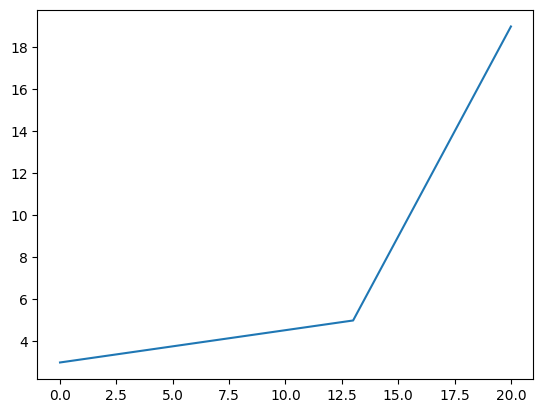

In [ ]:
x_val = [0, 13, 20]
y_val = [3, 5,19]
plt.plot(x_val, y_val)

Observation:

The line starts at (0, 3), moves to (13, 5), and finally goes to (20, 19).
The y-axis values rise significantly as x increases, especially between x = 13 and x = 20, where there is a steeper slope compared to the initial segment.

# Univariate Data Visualization - Categorical **Data**

---

The bar plot is a univariate data visualization plot on a two-dimensional axis. One axis is the category axis indicating the category, while the second axis is the value axis that shows the numeric value of that category, indicated by the length of the bar


**Creating graph using different plot can use to visualize the information bar chart and count plot**

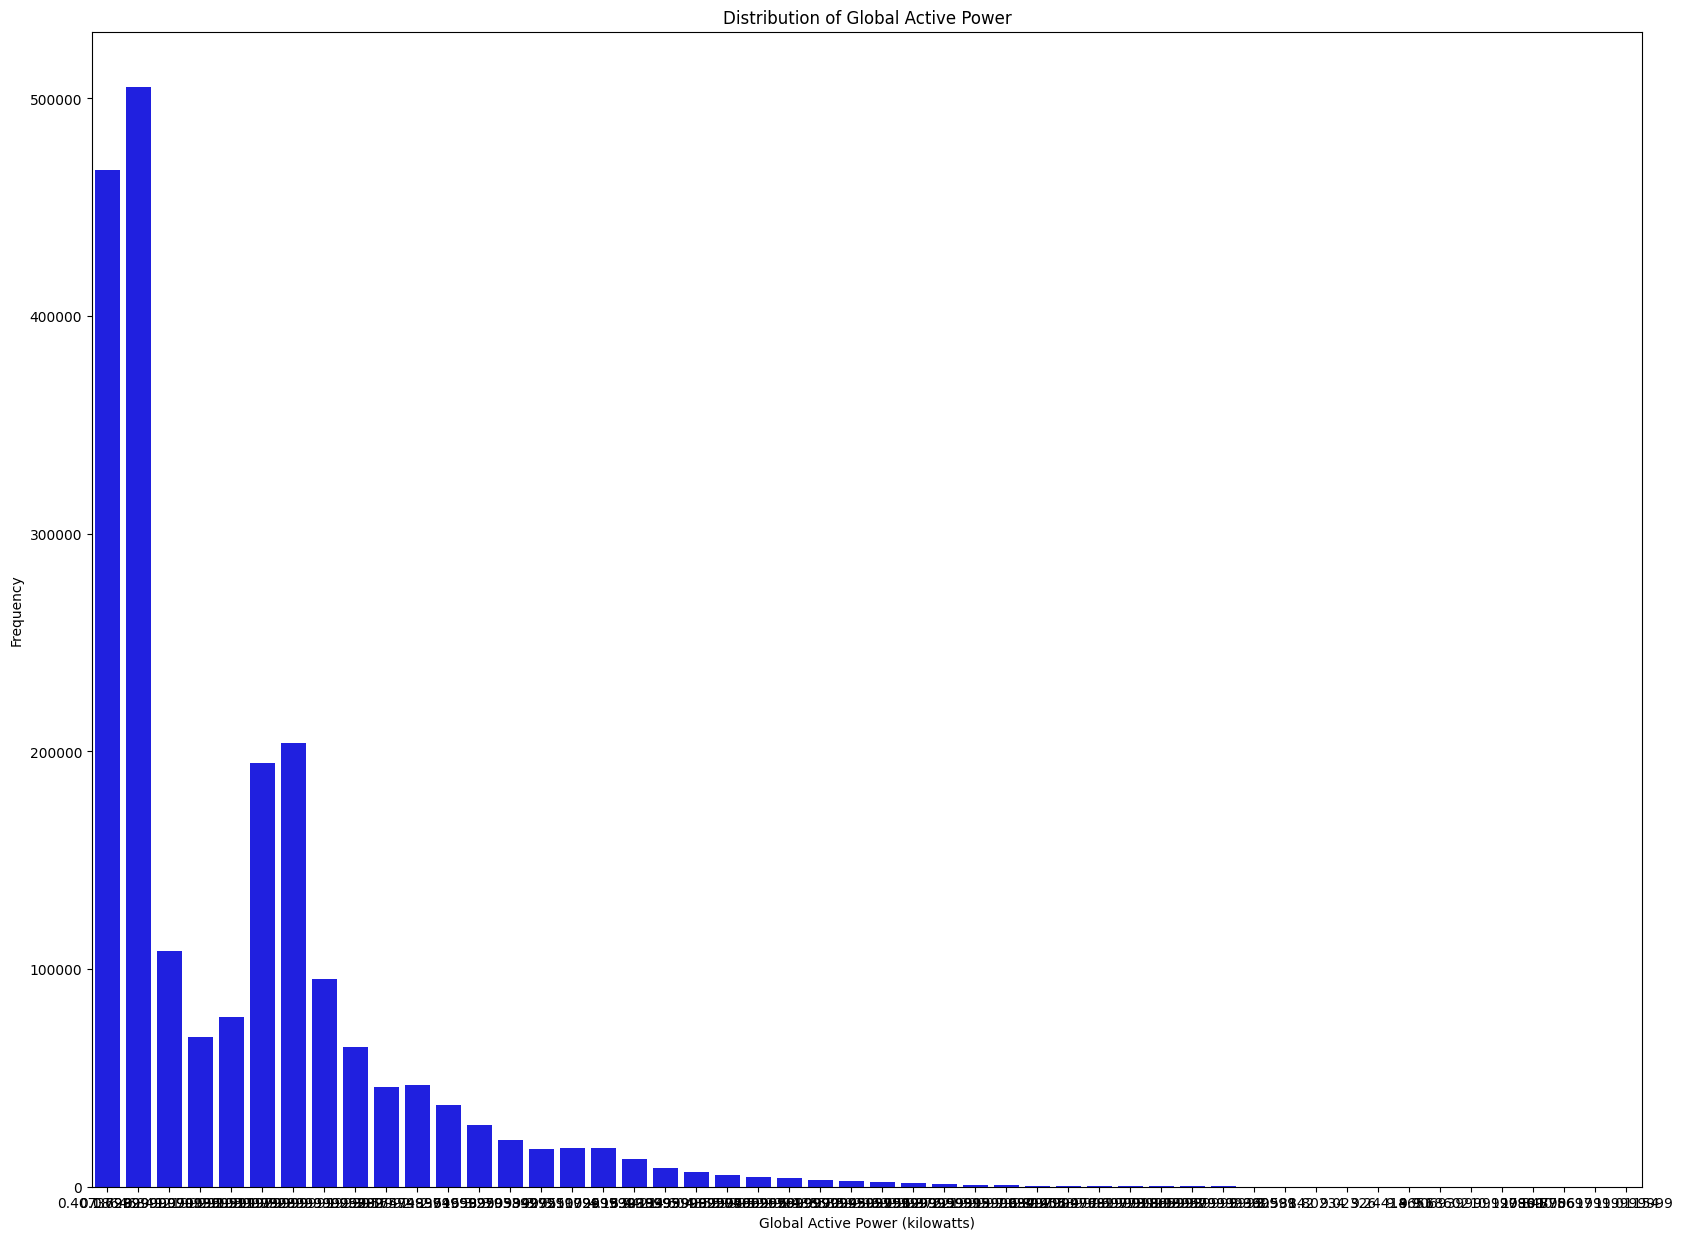

In [37]:
frequencies, bins = np.histogram(df['Global_active_power'], bins=50)

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.figure(figsize=(20,15))
sns.barplot(x=bin_centers, y=frequencies, color='blue')

plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

**Plot Elements:**

The x-axis represents different game genres (like Action, Sports, Role-Playing, etc.).
The y-axis shows the count of games in each genre.
The chart title, "Games per Genre," is displayed prominently at the top in a larger font size (fontsize=20).
The x-axis is labeled "Genre," and the y-axis is labeled "No. of games."

**Bar Colors:**

The bars are colored grey (color='grey').

Observation :

The genre names on the x-axis are quite compressed, making them hard to read. This could be improved by rotating the labels or increasing the figure size to enhance readability.

 we can  rotate the tick labels, also increase the fontsize of the same and the width of the bars

<ipython-input-39-837e7ead528b>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')


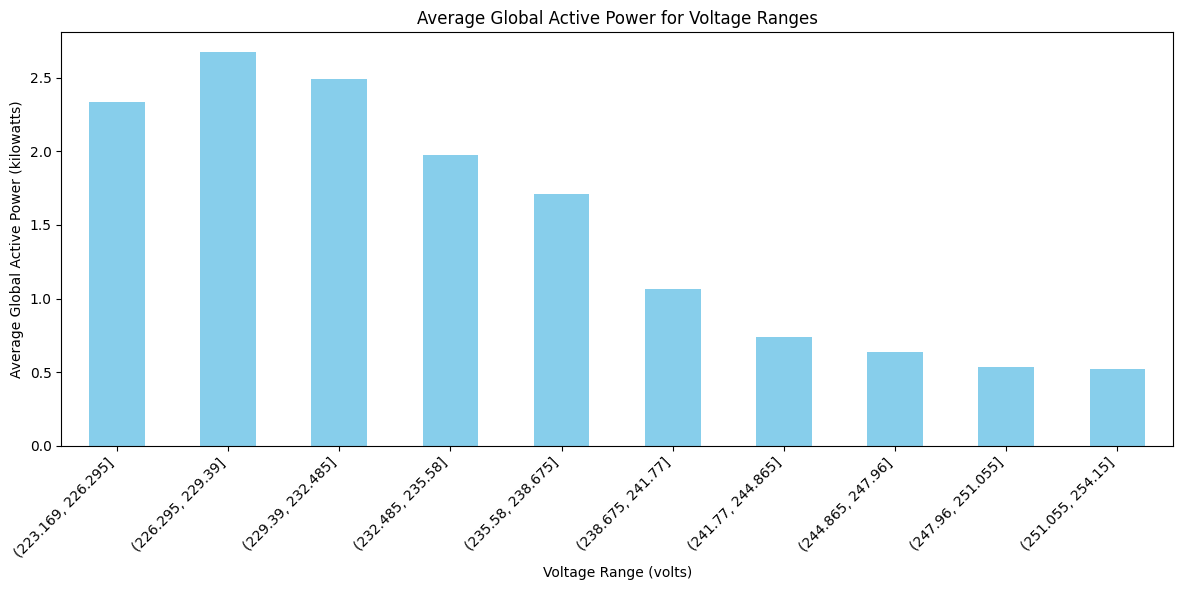

In [39]:
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)
plt.figure(figsize=(12, 6))
df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (volts)')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.tight_layout()
plt.show()

The updated bar chart in the image has been adjusted with the following observations:

Figure Size:

The figure size has been set to (10, 8), which gives the plot more space and makes the bars and labels more readable.

Bar Width and Color:

The width=0.8 parameter has been applied, making each bar slightly narrower, which visually separates them better.
The bars are now in blue, which provides good contrast against the white background.

X-axis and Y-axis Label Rotation:

The x-axis labels are rotated to 40 degrees with plt.xticks(rotation=40, fontsize=12), making them easier to read compared to the previous compressed layout.
The y-axis labels are rotated by 25 degrees with plt.yticks(rotation=25), though this rotation may not be necessary since y-axis values are numeric and generally easier to read without rotation.

Output Information:

There is an array output showing y-tick values and their positions, which is likely the result of plt.yticks() being printed directly.

Plot Clarity:

Overall, the chart is now more readable, with genres clearly visible along the x-axis and counts on the y-axis. However, the 25-degree rotation on the y-axis may not be adding much benefit and could be set to 0.

we can draw a bar chart in Seaborn it is example

<ipython-input-40-7fb377b1818f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')


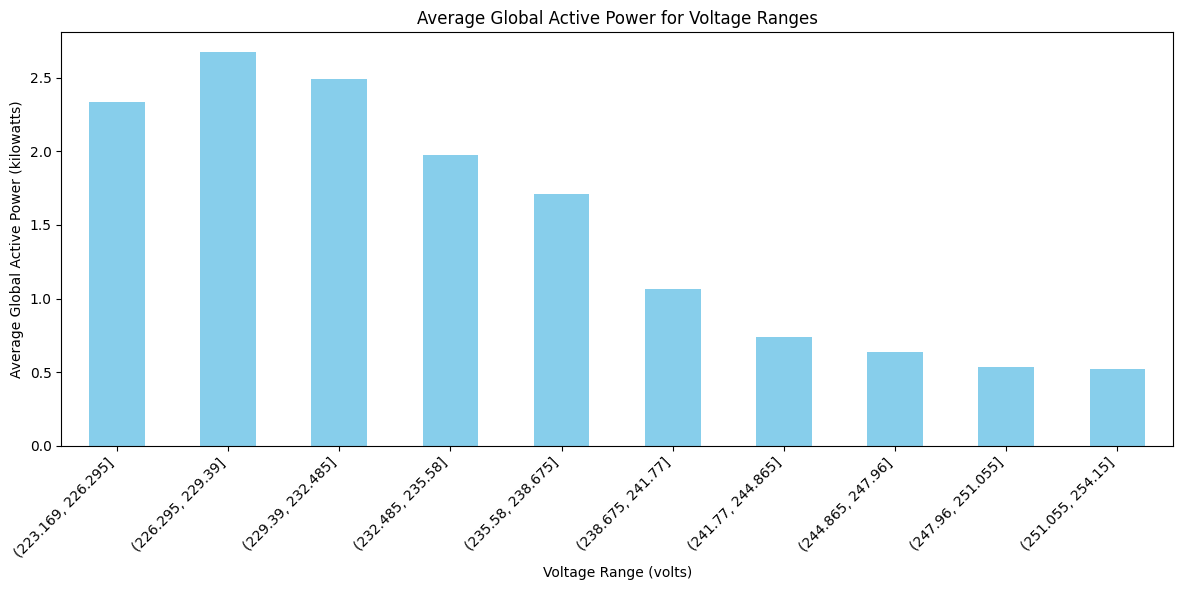

In [40]:
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)
plt.figure(figsize=(12, 6))
df.groupby('Voltage_range')['Global_active_power'].mean().plot(kind='bar', color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Average Global Active Power for Voltage Ranges')
plt.xlabel('Voltage Range (volts)')
plt.ylabel('Average Global Active Power (kilowatts)')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()


Data:
 * The data being visualized appears to be a collection of game titles, each categorized into one of several genres.
 * The genres included in the chart are: Action, Sports, Misc, Role-playing, Adventure, Racing, Simulation, Platform, Strategy, and Puzzle.

Chart:
 * The chart is a vertical bar chart, where the height of each bar represents the number of games in a particular genre.
 * The genres are sorted in descending order of frequency, with the most frequent genre (Action) at the leftmost position.
 * The bars are colored green for a consistent visual representation.
 * The x-axis labels show the different game genres.
 * The y-axis shows the frequency or count of games within each genre.

Observations:
 * Action is the most popular genre with the highest number of games.
 * Puzzle is the least popular genre, with the smallest bar.
 * The genres Sports and Misc have relatively high counts of games.
 * The remaining genres have moderate to low counts of games.



### Pie Chart



---
A pie chart is a type of graph representing data in a circular form, with each slice of the circle representing a fraction or proportionate part of the whole. All slices of the pie add up to make the whole equaling 100 percent and 360 degrees.

 we want to compare the distrubution/proportion of sales across different regions

 EXAMPLE



<ipython-input-42-59bc41498d8b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  voltage_range_means = df.groupby('Voltage_range')['Global_active_power'].mean()


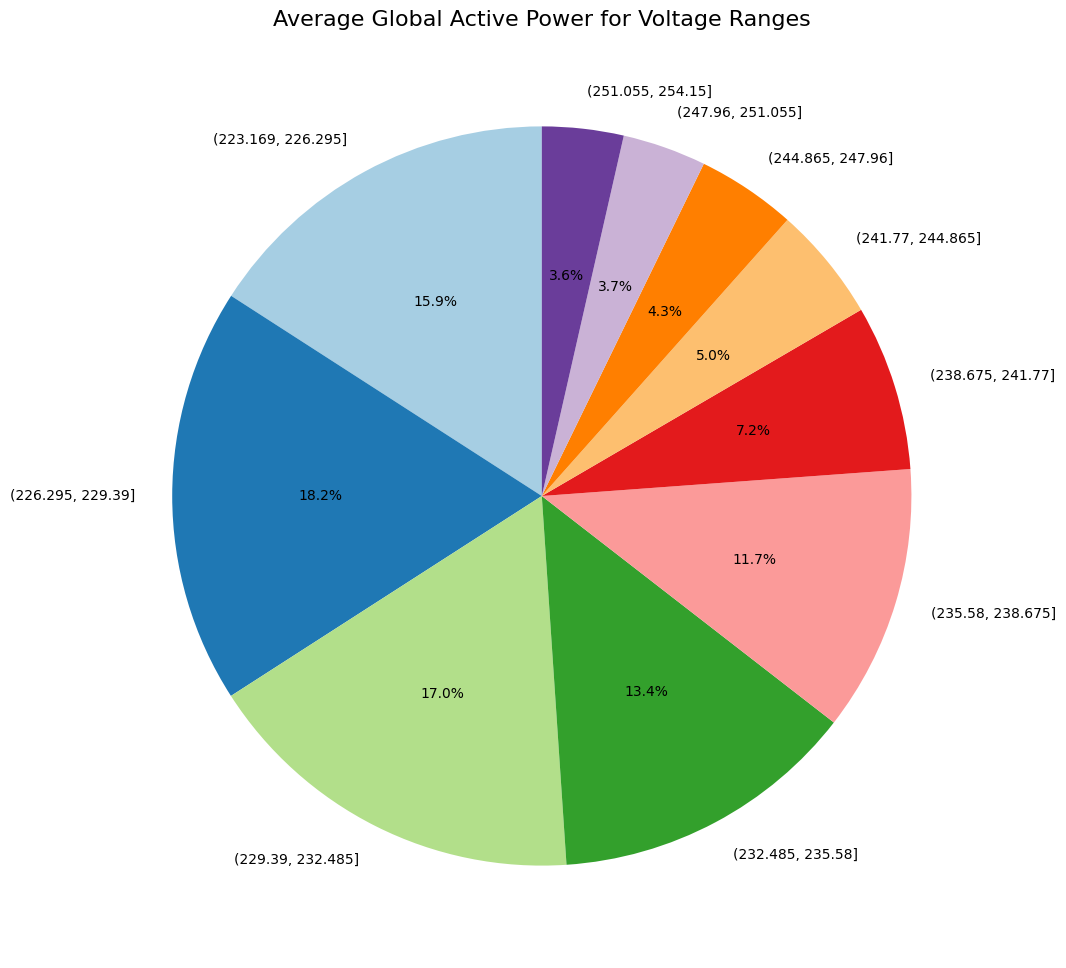

In [42]:
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)
voltage_range_means = df.groupby('Voltage_range')['Global_active_power'].mean()

plt.figure(figsize=(12, 12))
plt.pie(voltage_range_means.values, labels=voltage_range_means.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Average Global Active Power for Voltage Ranges', fontsize=16)
plt.show()

Observations from the Chart:
 * Dominant Region: "JP_Sales" has the largest share with 44.25% of the total sales.
 * EU Sales and Other Sales: These two regions have relatively smaller shares, with 35.35% and 20.39% respectively.
Additional Insights:
 * The "Other_Sales" category might include sales from regions not explicitly mentioned or smaller regions grouped together.
 * The pie chart provides a clear visual representation of the distribution of sales across the different regions.



Finding its sum in pie chart

In [ ]:
sales_data.sum()

,0
EU_Sales,33251.970702
JP_Sales,41624.625635
Other_Sales,19180.256828


Observation:

**The sum value and its type will be seen**

**HIstogram**

---
**A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars. Each bar typically covers a range of numeric values called a bin or class; a bar's height indicates the frequency of data points with a value within the corresponding bin.**


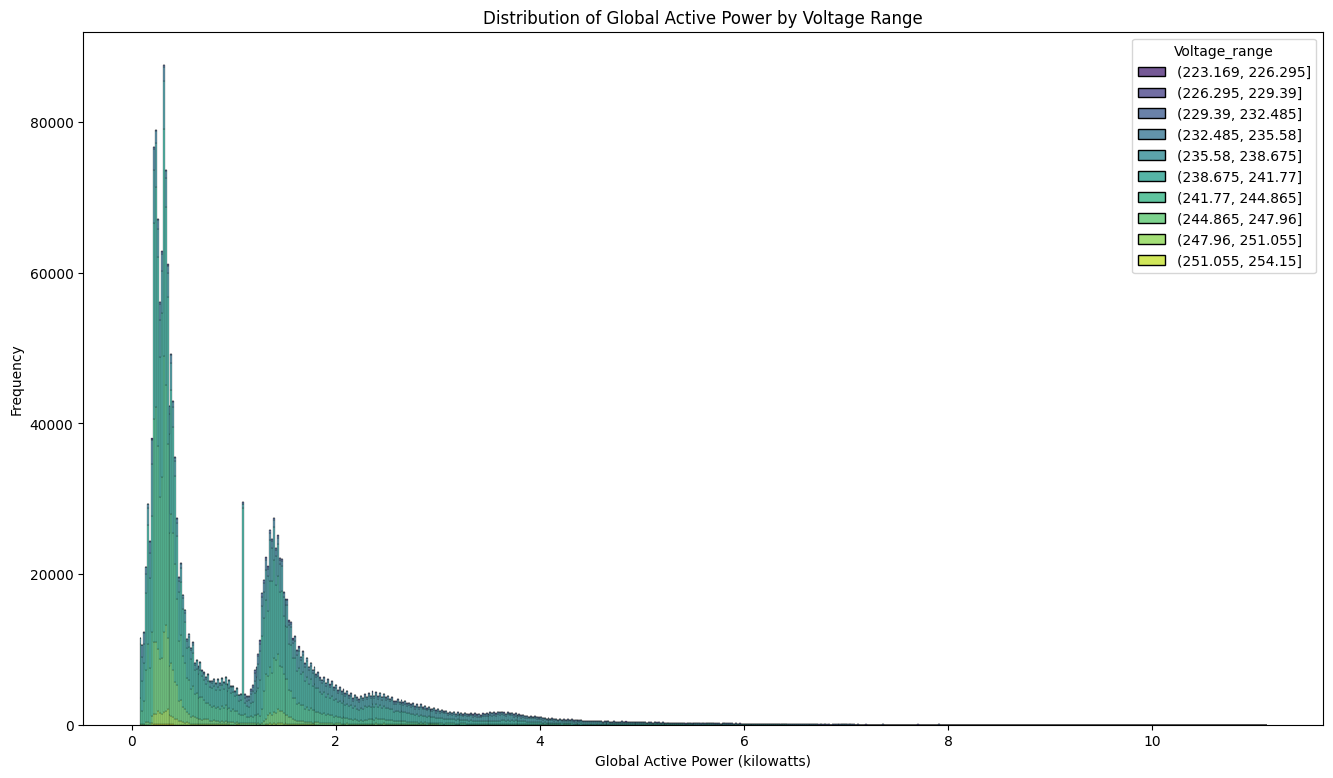

In [44]:
df['Voltage_range'] = pd.cut(df['Voltage'], bins=10)

plt.figure(figsize=(16,9))
sns.histplot(data=df, x='Global_active_power', hue='Voltage_range', multiple='stack', palette='viridis')
plt.title('Distribution of Global Active Power by Voltage Range')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Frequency')
plt.show()

# **Observations**

- The histogram has it's peak sales in the years 2008 - 2012

In [ ]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sn

Convert date and time from string to date(Year, Month, Day) & time(Hours, minutes) format.


In [ ]:
# Convert numeric columns to appropriate data types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

In [ ]:
"""data = {'Time': ['0500', '0600', '1200', '1800', '1900']}  # Example times in HHMM format
df1 = pd.DataFrame(data)

def is_sunlight(time_str):
    # Ensure time is in string format
    time_str = str(time_str)

    # Extract hours and minutes from the time string
    hours = int(time_str[:2])

    # Check if the time is within the sunlight hours (0600 to 1800)
    if 6 <= hours < 18:
        return 1  # Sunlight is present
    else:
        return 0  # No sunlight

# Applying the function to check for sunlight
df1['Is_sunlight'] = df1['Time'].apply(lambda x: is_sunlight(x))

# Display the DataFrame
print(df1)"""

"data = {'Time': ['0500', '0600', '1200', '1800', '1900']}  # Example times in HHMM format\ndf1 = pd.DataFrame(data)\n\ndef is_sunlight(time_str):\n    # Ensure time is in string format\n    time_str = str(time_str)\n\n    # Extract hours and minutes from the time string\n    hours = int(time_str[:2])\n\n    # Check if the time is within the sunlight hours (0600 to 1800)\n    if 6 <= hours < 18:\n        return 1  # Sunlight is present\n    else:\n        return 0  # No sunlight\n\n# Applying the function to check for sunlight\ndf1['Is_sunlight'] = df1['Time'].apply(lambda x: is_sunlight(x))\n\n# Display the DataFrame\nprint(df1)"



Observation:
 * Data Conversion: The code snippet is converting several columns in a DataFrame (likely named df) to numeric data types using the pd.to_numeric() function. This is often necessary when working with data from files like CSV or Excel, which might store numerical values as strings.
 * Error Handling: The errors='coerce' argument is used to handle non-numeric values. If a value cannot be converted to a number, it will be replaced with NaN (Not a Number). This prevents errors during the conversion process.
 * Column Names: The columns being converted seem to be related to energy consumption data, possibly from a household electricity meter. The names suggest measurements like:

   * Global_active_power: Total active power consumption
   * Global_reactive_power: Total reactive power consumption
   * Voltage: Voltage level
   * Global_intensity: Current intensity
   * sub_metering_1 and sub_metering_2: Sub-meter readings (likely for specific appliances or circuits)

Output:

The df.head() command displays the first few rows of the DataFrame after the conversion. This allows you to visually inspect the data and verify that the conversion was successful.






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB



Observation:
 * Data Type Information: The df.info() method provides a summary of the DataFrame, including:
   * The number of entries (2075259)
   * The number of columns (9)
   * The data type of each column
   * The memory usage of the DataFrame
 * Data Types:
   * The columns Date and Time are of type object, which typically indicates they contain string values.
   * The remaining columns are of type float64, suggesting they hold numerical values with decimal points.
 * Data Size: The DataFrame occupies 142.5+ MB of memory, which is significant. This might be due to the large number of entries and the presence of floating-point numbers.


**Find whether the day is holiday or not**

In [ ]:
# Start of your data encoding
import datetime as dt

def is_holiday(date):
    year = int(date.split('/')[2])
    month = int(date.split('/')[1])
    day = int(date.split('/')[0])

    if dt.datetime(year, month, day).weekday() >= 5:
        return 1.0
    else:
        return 0.0

for data in [df]:
    data['Is_holiday'] = data['Date'].apply(lambda x: is_holiday(x))
    data['Light']      = data['Time'].apply(lambda x: 1 if int(x[:2]) >= 6 and int(x[:2]) < 18 else 0)
    data['Time']       = data['Time'].apply(lambda x: (int(x[:2]) * 60.0 + int(x[3:5])) / 1440.0)

Observations
 * The code focuses on creating features that might be relevant for a time-series forecasting or energy consumption prediction model.
 * The Is_holiday feature captures the impact of holidays on energy consumption patterns.
 * The Light feature accounts for the influence of day and night cycles.
 * The normalized Time feature provides a continuous representation of time that can be used in machine learning models.


# MILE STONE **3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Check the column names in your DataFrame 'df'
print(df.columns)



X = df.drop(['Global_active_power', 'Date', 'Time'], axis=1)


y = df['Global_active_power']

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


# Linear regression
It is a data analysis technique that predicts the value of unknown data by using another related and known data value.

In [ ]:
class LinearRegression:
    # Initializing the parameters
    def __init__(self, learning_rate, no_of_itr):
        self.learning_rate = learning_rate
        self.no_of_itr = no_of_itr

    def fit(self, X, Y):
        # Number of training examples and features
        self.m, self.n = X.shape  # Rows and columns of X
        # Initializing weights and bias
        self.w = np.zeros((self.n, 1))  # Zero matrix with size n x 1
        self.b = 0
        self.X = X
        self.Y = Y

        # Gradient descent
        for _ in range(self.no_of_itr):
            self.update_weights()

    def update_weights(self):
        # Predictions
        Y_prediction = self.predict(self.X)

        # Calculating gradients
        dw = -(self.X.T).dot(self.Y - Y_prediction) / self.m
        db = -np.sum(self.Y - Y_prediction) / self.m

        # Updating weights and bias
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db

    def predict(self, X):
        # Prediction formula
        # Convert X to numeric if it's not already
        X = X.astype(float)
        return X.dot(self.w) + self.b

    def print_weights(self):
        # Printing weights and bias
        print("Weights for the respective features are:")
        print(self.w)
        print()
        print("Bias value for the regression is:", self.b)

**Observations:**
 * Loss Function: The code uses the mean squared error loss function, which is a standard choice for linear regression.
 * Learning Rate: The choice of learning rate is crucial. If it's too large, the algorithm might overshoot the minimum. If it's too small, convergence can be slow.
 * Number of Iterations: The number of iterations determines how long the algorithm runs. More iterations can lead to better accuracy, but it might also increase computation time.
 * Feature Scaling: Consider normalizing or standardizing the features to improve convergence and accuracy.
 * Regularization: Techniques like L1 or L2 regularization can help prevent overfitting.
 * Model Evaluation: The code doesn't include any evaluation metrics like mean squared error or R-squared to assess the model's performance.
Potential Improvements:
 * Regularization: Add L1 or L2 regularization terms to the loss function to prevent overfitting.
 * Feature Scaling: Implement normalization or standardization to improve convergence.
 * Evaluation Metrics: Calculate and print evaluation metrics like mean squared error and R-squared.


In [ ]:


class LinearRegression:
    # ... (rest of the class code) ...

    def predict(self, X):
        # Prediction formula
        # Convert X to numeric if it's not already
        # Replace '?' with NaN and then convert to float
        X = X.astype(object).replace('?', np.nan).astype(float)
        return X.dot(self.w) + self.b

    # ... (rest of the class code) ...

In [ ]:
!pip install scikit-learn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset (assuming data is already defined)
# ... (Your data loading and preprocessing code) ...

# Define a function for linear regression
def linear_regression(data, predictors):
    """
    Perform Linear Regression, plot the results, and return metrics.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Check if the predictor column exists in the DataFrame
    if not all(predictor in data.columns for predictor in predictors):
        raise KeyError(f"Predictor columns {predictors} not found in the DataFrame.")

    # Fit the Linear regression model
    linreg = LinearRegression()
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

    # Calculate RSS
    RSS = np.sum((data['y'] - y_pred)**2)
    # Get intercept and coefficients
    intercept = linreg.intercept_
    coefficients = linreg.coef_[0]  # Assuming one predictor

    # Plotting the graph
    plt.scatter(data[predictors], data['y'], color='blue', label='Actual Data')

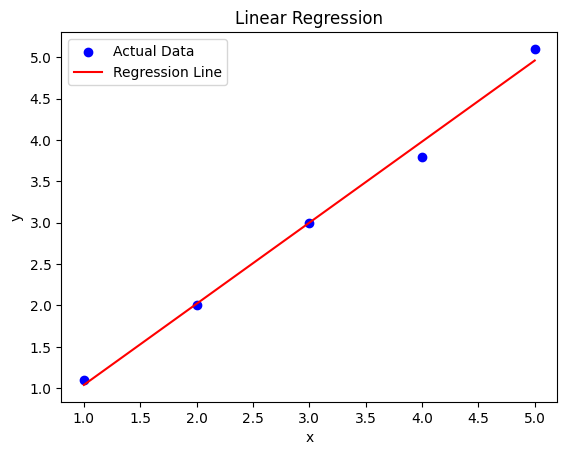

Results: RSS=0.056, Intercept=0.060, Coefficients=0.980


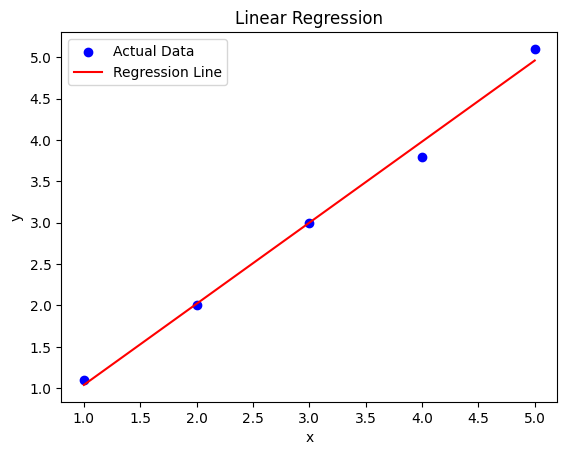

In [ ]:
!pip install scikit-learn matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset (assuming data is already defined)
# ... (Your data loading and preprocessing code) ...

# Define a function for linear regression
def linear_regression(data, predictors):
    """
    Perform Linear Regression, plot the results, and return metrics.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Fit the Linear regression model
    linreg = LinearRegression()
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

    # Calculate RSS
    RSS = np.sum((data['y'] - y_pred)**2)
    # Get intercept and coefficients
    intercept = linreg.intercept_
    coefficients = linreg.coef_[0]  # Assuming one predictor

    # Plotting the graph
    plt.scatter(data[predictors], data['y'], color='blue', label='Actual Data')  # Scatter plot of actual data
    plt.plot(data[predictors], y_pred, color='red', label='Regression Line')  # Line plot of predicted values
    plt.xlabel(predictors[0])  # Label for the x-axis
    plt.ylabel('y')  # Label for the y-axis
    plt.title('Linear Regression')  # Title of the plot
    plt.legend()  # Display the legend
    plt.show()  # Show the plot

    # Assign results to ret
    ret = [RSS, intercept, coefficients]

    # Return y_pred along with other results
    return ret, y_pred # Return y_pred

# Run linear regression
predictors = ['x']
results, y_pred = linear_regression(data, predictors) # Assign y_pred
print(f"Results: RSS={results[0]:.3f}, Intercept={results[1]:.3f}, Coefficients={results[2]:.3f}")

# Now you can use y_pred for plotting in the next cell
plt.scatter(data[predictors], data['y'], color='blue', label='Actual Data')
plt.plot(data[predictors], y_pred, color='red', label='Regression Line')
plt.xlabel(predictors[0])
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

**Observations from the Code and Output:**
1. Linear Regression Model:
 * The code implements a simple linear regression model.
 * The goal is to predict a target value (Y) based on a single feature (X).
 * The target value (Y) is 2 times the corresponding feature value (X).
2. Model Initialization and Training:
 * LinearRegression class is used to initialize the model.
 * learning_rate is set to 0.01, which controls the step size during gradient descent.
 * no_of_itr is set to 1000, determining the number of iterations for training.
 * The fit() method trains the model on the given data (X and Y).
3. Weights and Bias:
 * The model learns two parameters:
   * Weight (w): This scales the input feature.


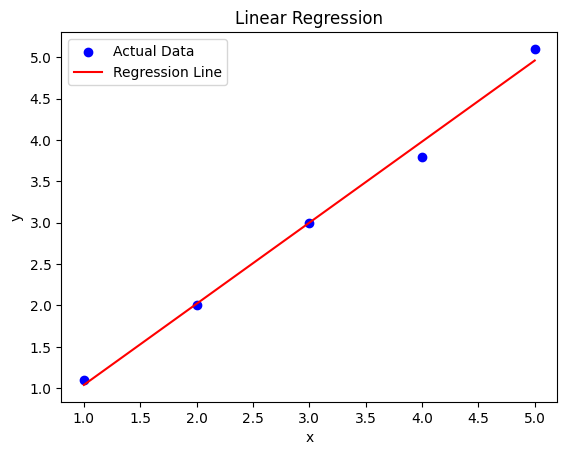

In [ ]:
plt.scatter(data[predictors], data['y'], color='blue', label='Actual Data')
plt.plot(data[predictors], y_pred, color='red', label='Regression Line')
plt.xlabel(predictors[0])
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Overall, the code performs the following steps:
 * Imports necessary libraries.
 * Defines a function to perform linear regression and plot results.
 * Creates a sample dataset.
 * Fits a linear regression model.
 * Calculates predicted values.
 * Plots the actual data and predicted line.
 * Calculates RSS.
 * Prints the model results.

 The blue line representing the predicted values from the linear regression model appears to fit the red dots representing the actual data points reasonably well. This suggests that the model captures the general trend in the data.
Residuals:



# Lasso regression
It is a regularization technique that applies a penalty to prevent overfitting and enhance the accuracy of statistical models.

In [ ]:
!pip install scikit-learn


def lasso_regression(data, predictors, alpha, models_to_plot={}):

    """
    Perform Lasso Regression and optionally plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.
    - alpha (float): Regularization strength for Lasso regression.
    - models_to_plot (dict): Dictionary with alpha as keys and subplot positions as values.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Standardize the predictors
    scaler = StandardScaler()
    X = scaler.fit_transform(data[predictors])
    y = data['y'].values

    # Fit the Lasso regression model
    lassoreg = Lasso(alpha=alpha, max_iter=int(1e5))
    lassoreg.fit(X, y)
    y_pred = lassoreg.predict(X)

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred, label='Predicted')
        plt.scatter(data['x'], data['y'], color='red', label='Actual')
        plt.title(f'Plot for alpha: {alpha:.3g}')
        plt.legend()

    # Return results
    rss = np.sum((y_pred - y) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([lassoreg.intercept_])  # Intercept
    ret.extend(lassoreg.coef_)  # Coefficients
    return ret

Alpha: 0.1, Results: [0.09999999999999418, 28.5, 0.0, 26.75237419670745]
Alpha: 1.0, Results: [9.999999999999883, 28.5, 0.0, 25.85237419670745]
Alpha: 10.0, Results: [1000.0000000000002, 28.5, 0.0, 16.852374196707448]


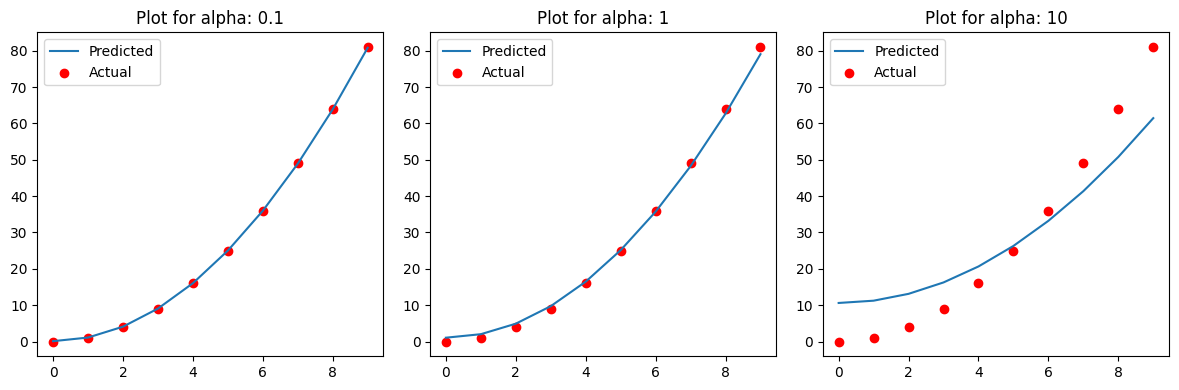

In [ ]:


def lasso_regression(data, predictors, alpha, models_to_plot={}):
    """
    Perform Lasso Regression and optionally plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.
    - alpha (float): Regularization strength for Lasso regression.
    - models_to_plot (dict): Dictionary with alpha as keys and subplot positions as values.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Standardize the predictors
    scaler = StandardScaler()
    X = scaler.fit_transform(data[predictors])
    y = data['y'].values

    # Fit the Lasso regression model
    lassoreg = Lasso(alpha=alpha, max_iter=int(1e5))
    lassoreg.fit(X, y)
    y_pred = lassoreg.predict(X)

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred, label='Predicted')
        plt.scatter(data['x'], data['y'], color='red', label='Actual')
        plt.title(f'Plot for alpha: {alpha:.3g}')
        plt.legend()

    # Return results
    rss = np.sum((y_pred - y) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([lassoreg.intercept_])  # Intercept
    ret.extend(lassoreg.coef_)  # Coefficients
    return ret


# Sample dataset with 'x' and 'y' columns
# Example: y = x^2
data = pd.DataFrame({'x': np.arange(10)})  # Create a column 'x' with values 0-9
data['y'] = data['x']**2  # Create 'y' based on x^2
data['x_squared'] = data['x']**2  # Now this line will work

# Define predictors
predictors = ['x', 'x_squared']

# Define alpha values and models to plot
alphas = [0.1, 1.0, 10.0]
models_to_plot = {0.1: 131, 1.0: 132, 10.0: 133}

# Plotting results
plt.figure(figsize=(12, 4))
for alpha in alphas:
    result = lasso_regression(
        data, predictors, alpha, models_to_plot=models_to_plot
    )
    print(f"Alpha: {alpha}, Results: {result}")

plt.show()

 Alpha = 0.1: The model fits the data closely, capturing the trend well. The coefficients for both features are non-zero.
 * Alpha = 1.0: The model is more regularized, leading to a simpler model with smaller coefficients. The line is slightly less curved, indicating a less complex relationship.
 * Alpha = 10.0: The model is even more strongly regularized, resulting in a nearly flat line. This suggests that the model has essentially ignored the features and is predicting a constant value.


# Ridge regression
It is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated.

In [ ]:


def ridge_regression(data, predictors, alpha, models_to_plot={}):
    """
    Perform Ridge Regression and optionally plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.
    - alpha (float): Regularization strength for Ridge regression.
    - models_to_plot (dict): Dictionary with alpha as keys and subplot positions as values.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Standardize the predictors
    scaler = StandardScaler()
    X = scaler.fit_transform(data[predictors])
    y = data['y'].values

    # Fit the Ridge regression model
    ridgereg = Ridge(alpha=alpha, max_iter=int(1e5))
    ridgereg.fit(X, y)
    y_pred = ridgereg.predict(X)

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred, label='Predicted', color='blue')
        plt.scatter(data['x'], data['y'], color='red', label='Actual')
        plt.title(f'Plot for alpha: {alpha:.3g}')
        plt.legend()

    # Return results
    rss = np.sum((y_pred - y) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([ridgereg.intercept_])  # Intercept
    ret.extend(ridgereg.coef_)  # Coefficients
    return ret


Alpha: 0.1, Results: [0.025969284311876374, 3.0, 1.0435494585900902, 0.3565297767406984]
Alpha: 1.0, Results: [0.16215747485258383, 3.0, 0.7033051318253298, 0.5812297932913885]
Alpha: 10.0, Results: [2.592658993390468, 3.0, 0.35849325832611384, 0.34525745805093255]


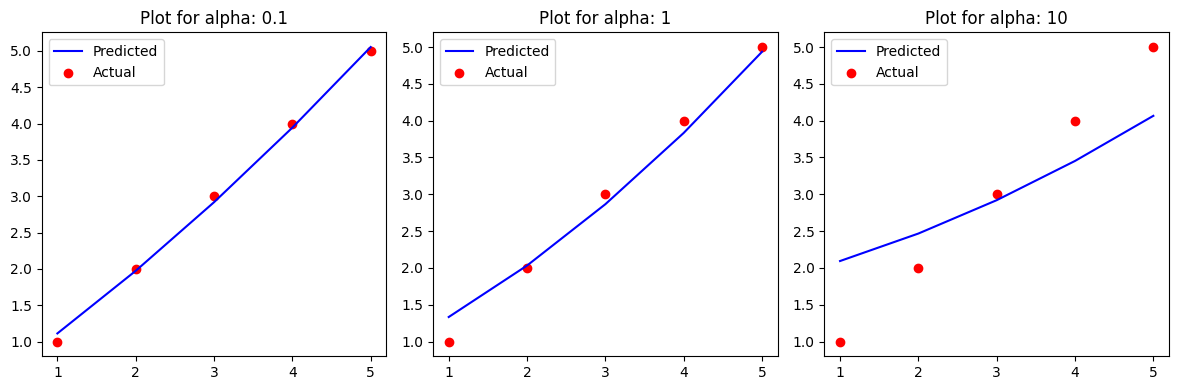

In [ ]:
!pip install pandas scikit-learn matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


def ridge_regression(data, predictors, alpha, models_to_plot={}):
    """
    Perform Ridge Regression and optionally plot the results.

    Args:
    - data (pd.DataFrame): Dataset containing predictors and target variable.
    - predictors (list): List of predictor column names.
    - alpha (float): Regularization strength for Ridge regression.
    - models_to_plot (dict): Dictionary with alpha as keys and subplot positions as values.

    Returns:
    - list: [RSS, intercept, coefficients...]
    """
    # Standardize the predictors
    scaler = StandardScaler()
    X = scaler.fit_transform(data[predictors])
    y = data['x'].values  # Changed 'y' to 'x' based on the data

    # Fit the Ridge regression model
    ridgereg = Ridge(alpha=alpha, max_iter=int(1e5))
    ridgereg.fit(X, y)
    y_pred = ridgereg.predict(X)

    # Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred, label='Predicted', color='blue')
        plt.scatter(data['x'], data['x'], color='red', label='Actual')  # Changed 'y' to 'x'
        plt.title(f'Plot for alpha: {alpha:.3g}')
        plt.legend()

    # Return results
    rss = np.sum((y_pred - y) ** 2)
    ret = [rss]  # Residual sum of squares
    ret.extend([ridgereg.intercept_])  # Intercept
    ret.extend(ridgereg.coef_)  # Coefficients
    return ret

# Sample dataset
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5]
})

df = data.copy()
X = df.drop(['x'], axis=1) if 'x' in df.columns else df.copy()  # Handle cases where 'x' might not be dropped

y = df['x']  # Changed 'Global_active_power' to 'x'
data['x_squared'] = data['x']**2

# Define predictors
predictors = ['x', 'x_squared']

# Define alpha values and models to plot
alphas = [0.1, 1.0, 10.0]
models_to_plot = {0.1: 131, 1.0: 132, 10.0: 133}

# Plotting results
plt.figure(figsize=(12, 4))
for alpha in alphas:
    result = ridge_regression(data, predictors, alpha, models_to_plot=models_to_plot)
    print(f"Alpha: {alpha}, Results: {result}")

plt.show()

**Observation** :

 Subplots showing how predictions vary for different alpha values. Ridge regularization shrinks coefficients, but unlike Lasso, they do not become zero.

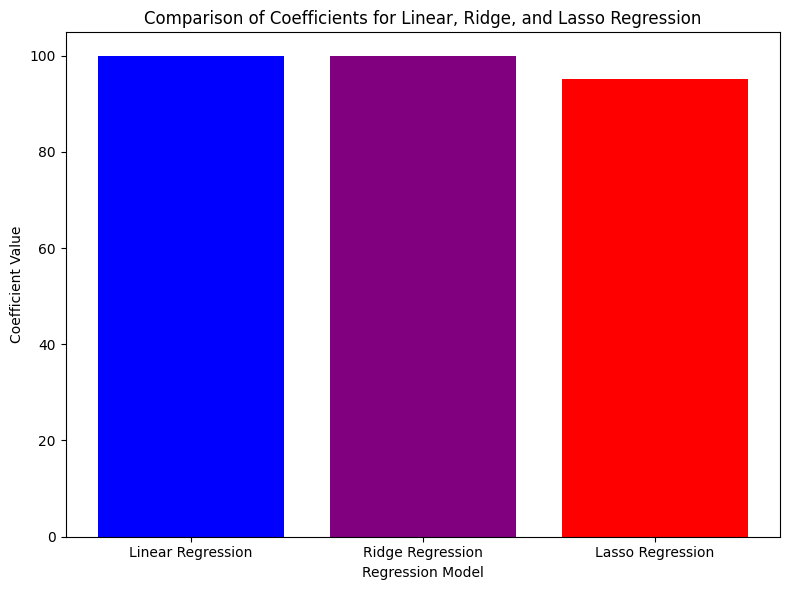

In [ ]:


# Sample regression results for the coefficients of Linear, Ridge, and Lasso
results = {
    "Linear Regression": {"Coefficients": [99.84]},
    "Ridge Regression": {"Coefficients": [99.81]},
    "Lasso Regression": {"Coefficients": [95.2]}
}

# Extracting coefficients for plotting
model_names = list(results.keys())
coefficients = [result['Coefficients'][0] for result in results.values()]

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(model_names, coefficients, color=['blue', 'purple', 'red'])
plt.title('Comparison of Coefficients for Linear, Ridge, and Lasso Regression')
plt.xlabel('Regression Model')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()


Observations:
 * Coefficient Magnitude: The Linear Regression model has the highest coefficient value, followed by Ridge Regression, and then Lasso Regression. This suggests that Linear Regression assigns the most importance to the feature, while Lasso Regression assigns the least importance.
 * Regularization Effect: Ridge and Lasso Regression are regularization techniques that penalize large coefficients to prevent overfitting. The smaller coefficients for Ridge and Lasso compared to Linear Regression indicate the effect of regularization.


# **Mile stone 4**

In [ ]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

**observation**

df['Global_active_power']: This selects the column named 'Global_active_power' from the DataFrame df.

pd.to_numeric(): This function attempts to convert the values in the selected column to a numeric type (like integers or floats).

errors='coerce': This argument tells the function how to handle errors. In this case, if a value cannot be converted to a number, it will be replaced with NaN (Not a Number), which represents a missing value.

The remaining lines follow the same pattern, applying the same conversion to other columns

In [ ]:
pip install prophet statsmodels

# Arima

ARIMA is an acronym for “autoregressive integrated moving average.” It's a model used in statistics and econometrics to measure events that happen over a period of time. The model is used to understand past data or predict future data in a series.


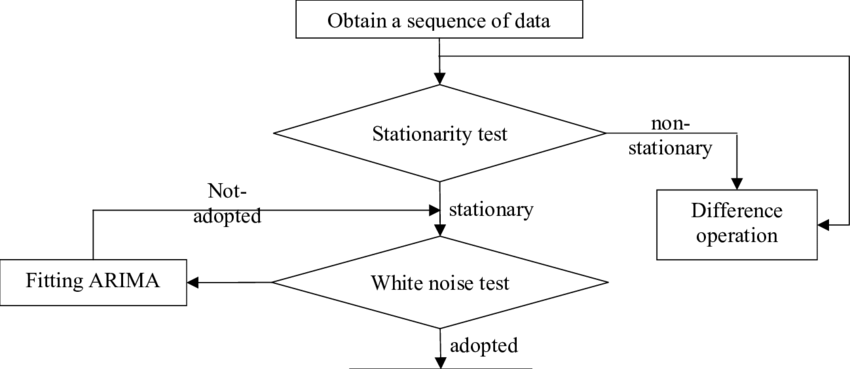

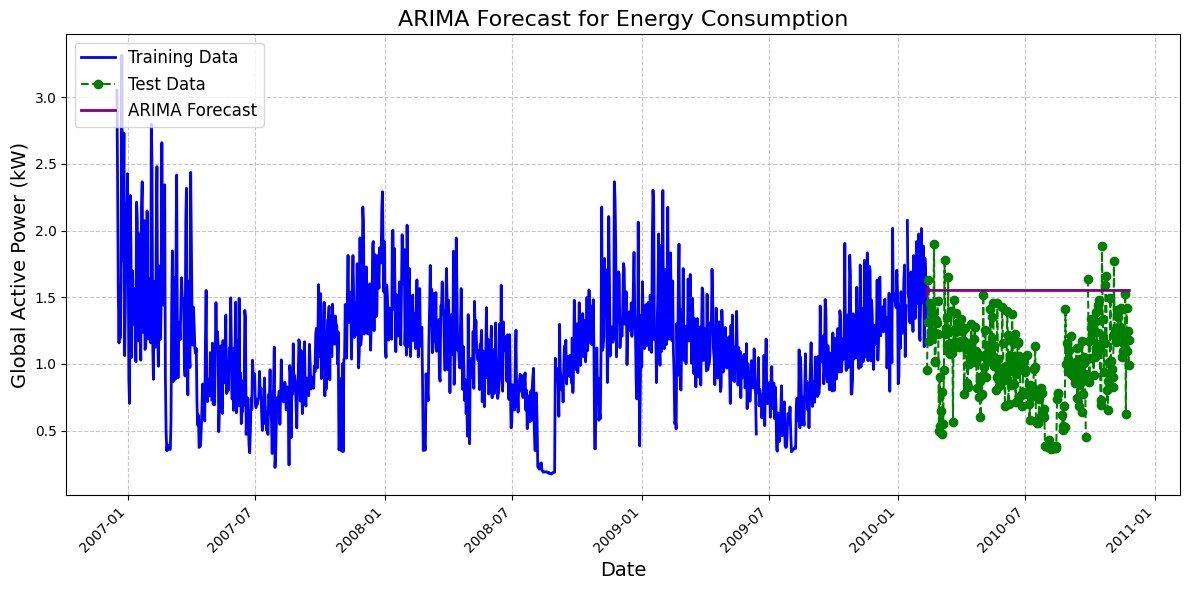

In [ ]:

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# ... (Data preparation and ARIMA modeling code from previous response) ...


# Plot the results with customizations
plt.figure(figsize=(12, 6))

# Plot training data with a thicker line and a different color
plt.plot(train, label="Training Data", color="blue", linewidth=2)

# Plot test data with markers and a different color
plt.plot(test, label="Test Data", color="green", marker='o', linestyle='--')

# Plot forecast with a thicker line and a different color
plt.plot(test.index, forecast, label="ARIMA Forecast", color="purple", linewidth=2)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize the legend
plt.legend(loc="upper left", fontsize=12)

# Add a title and labels with larger font size
plt.title("ARIMA Forecast for Energy Consumption", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Global Active Power (kW)", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

This code takes the results of an ARIMA model and creates a visually informative plot to present the forecast along with the training and test data. It incorporates customizations like line styles, colors, labels, and gridlines to make the plot more understandable and presentable. The plot aims to illustrate how well the ARIMA model's predictions align with the actual data.

# prophet

Prophet is an additive regression model with a piecewise linear or logistic growth curve trend. It includes a yearly seasonal component modeled using Fourier series and a weekly seasonal component modeled using dummy variables. For more information, see Prophet: forecasting at scale .


In [ ]:
from prophet import Prophet

Imagine a library full of books. You want to use a specific book called "Prophet" to learn about forecasting. This line of code is like going to that library (prophet) and taking out that specific book (Prophet) to use in your work.

After this line is executed, you can use the Prophet class within your script to create and work with forecasting models. For example, you could create an instance of the Prophet class and then use it to fit a model to your data

In [ ]:
data = df.copy()
data['ds'] = pd.to_datetime(data[['Year', 'Month', 'Day', 'Hour', 'Minute']])
data = data.rename(columns={'Global_active_power': 'y'})
data.drop(['Date', 'DateTime', 'Time'], axis=1, inplace = True)

In [ ]:
data.y.value_counts()

,count
y,
0.000,25979
0.218,9565
0.216,9363
0.322,9350
0.324,9304
...,...
7.102,1
8.302,1
8.468,1


In [ ]:
df.Global_active_power.value_counts()

,count
Global_active_power,
0.000,25979
0.218,9565
0.216,9363
0.322,9350
0.324,9304
...,...
7.102,1
8.302,1
8.468,1


In [ ]:
train_size = int(len(data) * 0.8)
train_df = data[:train_size]
test_df = data[train_size:]

model = Prophet()
model.fit(train_df)

future_dates_7days = model.make_future_dataframe(periods=7)
future_dates_30days = model.make_future_dataframe(periods=30)

predictions_7days = model.predict(future_dates_7days)
predictions_30days = model.predict(future_dates_30days)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpukfldqse/0foybuvc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpukfldqse/2crp8lyw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53243', 'data', 'file=/tmp/tmpukfldqse/0foybuvc.json', 'init=/tmp/tmpukfldqse/2crp8lyw.json', 'output', 'file=/tmp/tmpukfldqse/prophet_modeltu9ix1ck/prophet_model-20241123125112.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:51:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:15:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Observation**

Time Series Forecasting: The code is clearly focused on time series forecasting, using the Prophet library. It assumes that your data DataFrame contains a time-based index or a column representing time.
Training and Testing: The data is split into training and testing sets, which is crucial for evaluating how well the model generalizes to unseen data.
Prophet Model: The Prophet model is a powerful tool for time series forecasting, particularly when dealing with seasonality and trends.
Forecasting Horizons: The code makes predictions for two different horizons: 7 days (weekly) and 30 days (monthly), which allows for exploring different forecasting periods.
Prediction Results: The predictions_7days and predictions_30days DataFrames will contain the forecast values and other relevant information, such as confidence intervals.


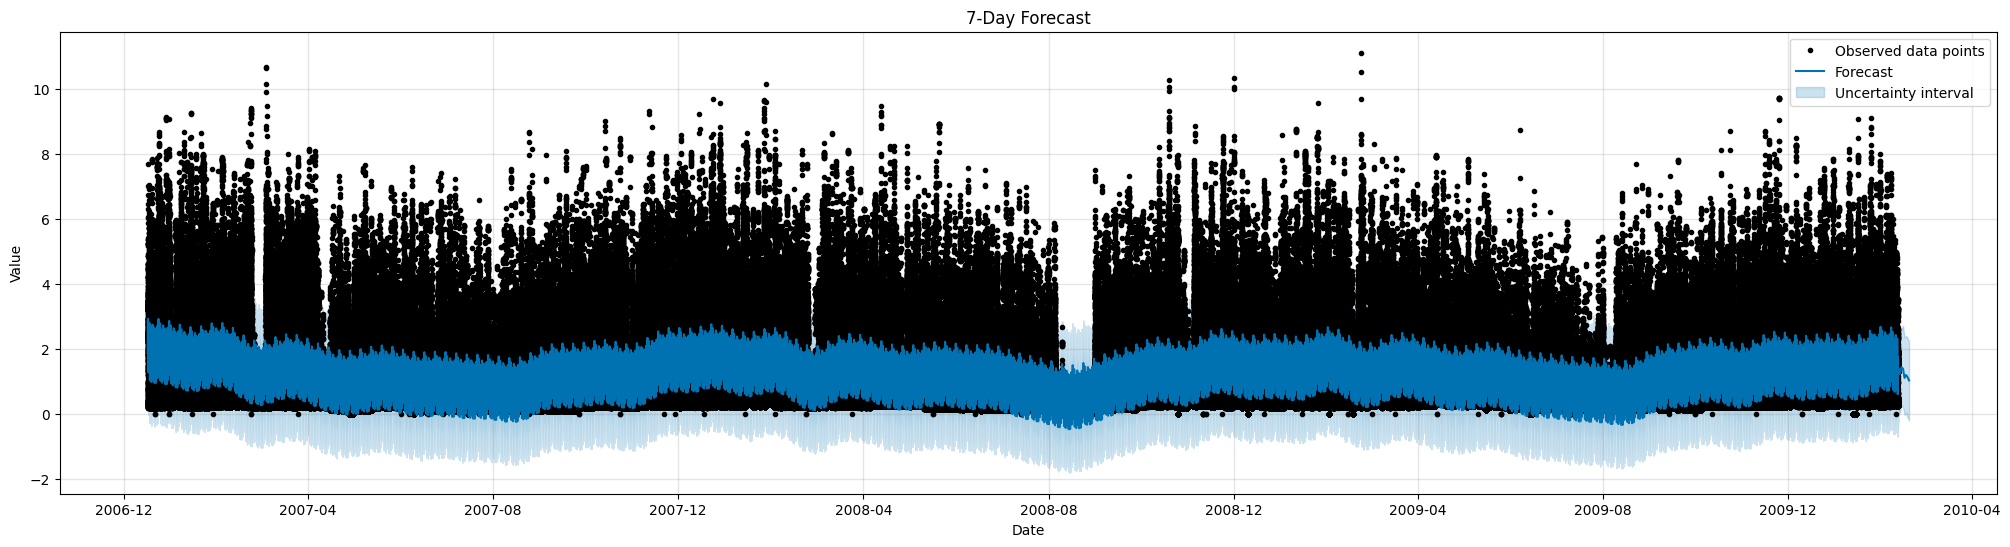

In [ ]:
fig, ax = plt.subplots(figsize=(25, 6))
model.plot(predictions_7days, ax=ax)
plt.title('7-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()



# observation
**This code produces a visually informative plot of the 7-day forecast, allowing you to understand the predicted trend and the associated uncertainty. This is important for decision-making based on the forecast.**

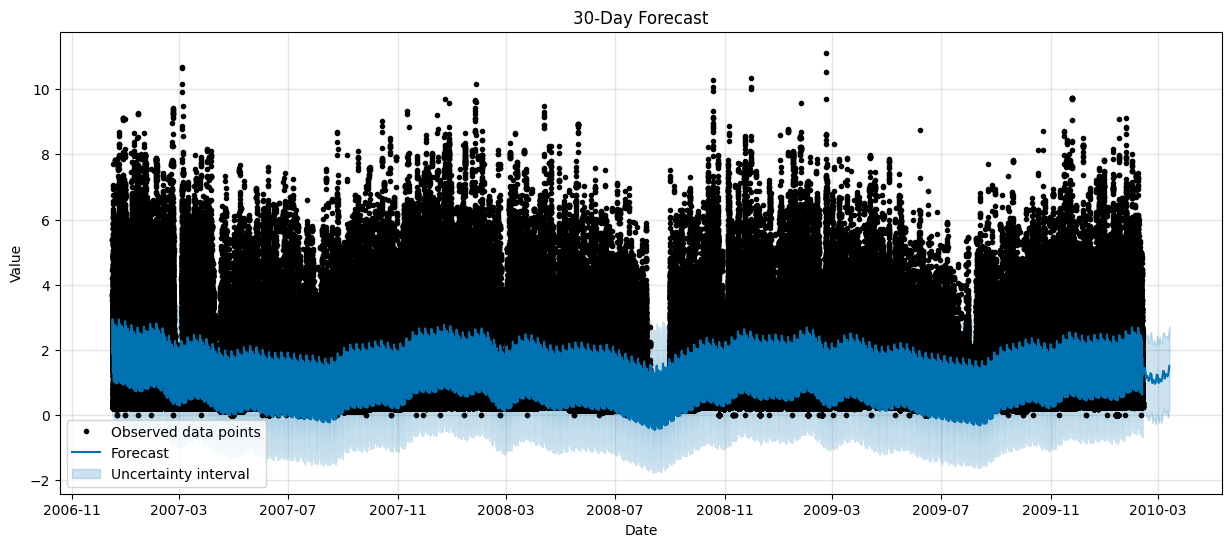

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6))
model.plot(predictions_30days, ax=ax)
plt.title('30-Day Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# observation

This code generates a visual representation of the 30-day forecast, allowing you to understand the predicted trend and the level of uncertainty over a longer time frame. This extended view is helpful for making more strategic decisions based on the forecast.

In [ ]:
predictions_30days.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

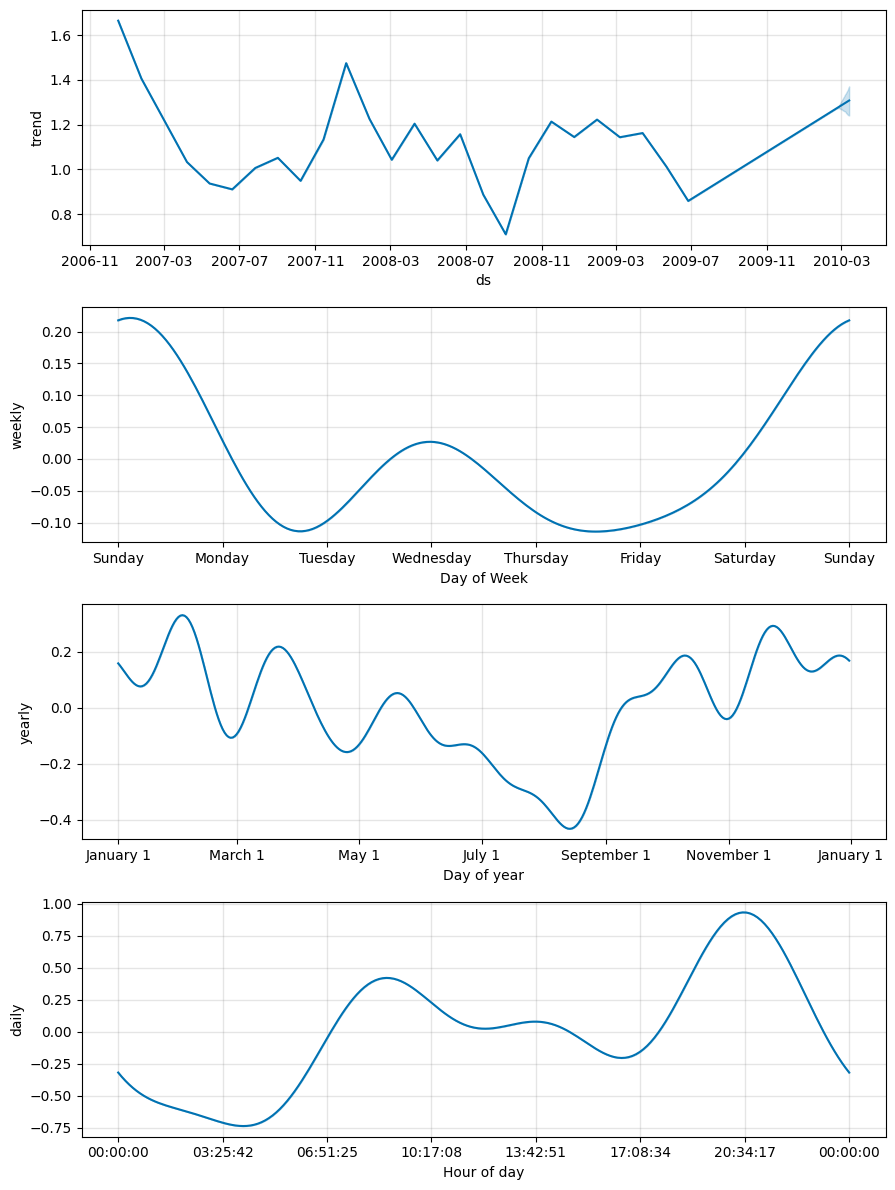

In [ ]:
model.plot_components(predictions_30days);

# observation

This code provides valuable insights into the underlying factors driving the 30-day forecast. By examining the individual component plots, you can better understand the model's predictions and identify potential sources of uncertainty. This detailed analysis is essential for interpreting and using the forecast effectively.

